# Прогнозы

### 1. Прогноз кол-ва подписчиков и обычных юзеров на ближайшие 5 лет

In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
st = 2013
end = 2023

2013
2014


/tmp/ipykernel_4085/2152499755.py:5: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')


2015


/tmp/ipykernel_4085/2152499755.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')


2016


/tmp/ipykernel_4085/2152499755.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')


2017


/tmp/ipykernel_4085/2152499755.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')


2018


/tmp/ipykernel_4085/2152499755.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')


2019
2020
2021
2022


22:51:49 - cmdstanpy - INFO - Chain [1] start processing
22:51:49 - cmdstanpy - INFO - Chain [1] done processing


CASUALS:
           ds          yhat    yhat_lower    yhat_upper
0  2013-01-01  4.217842e+05 -7.412680e+04  8.829456e+05
1  2014-01-01  4.983042e+05  2.424393e+04  9.941935e+05
2  2015-01-01  5.784636e+05  1.163157e+05  1.043775e+06
3  2016-01-01  6.624048e+05  1.639802e+05  1.128619e+06
4  2017-01-01  1.210239e+06  7.508195e+05  1.710776e+06
5  2018-01-01  1.286763e+06  7.842813e+05  1.773913e+06
6  2019-01-01  1.366927e+06  9.246699e+05  1.838897e+06
7  2020-01-01  1.450872e+06  9.821860e+05  1.908766e+06
8  2021-01-01  1.998706e+06  1.498402e+06  2.458411e+06
9  2022-01-01  2.075231e+06  1.603647e+06  2.524559e+06
10 2022-12-31  1.726720e+06  1.210941e+06  2.212767e+06
11 2023-12-31  1.827078e+06  1.359930e+06  2.323987e+06
12 2024-12-31  2.327202e+06  1.843909e+06  2.799096e+06
13 2025-12-31  2.419111e+06  1.963767e+06  2.933151e+06
14 2026-12-31  2.515187e+06  2.075671e+06  2.993856e+06
15 2027-12-31  2.615545e+06  2.157755e+06  3.042421e+06


22:51:51 - cmdstanpy - INFO - Chain [1] start processing
22:51:51 - cmdstanpy - INFO - Chain [1] done processing


MEMBERS:
           ds          yhat    yhat_lower    yhat_upper
0  2013-01-01  1.389080e+06  6.928600e+05  2.052162e+06
1  2014-01-01  1.673954e+06  1.015459e+06  2.295080e+06
2  2015-01-01  1.946456e+06  1.289559e+06  2.599911e+06
3  2016-01-01  2.206522e+06  1.519889e+06  2.913882e+06
4  2017-01-01  2.267202e+06  1.629748e+06  2.983398e+06
5  2018-01-01  2.552076e+06  1.848561e+06  3.222886e+06
6  2019-01-01  2.824578e+06  2.120328e+06  3.531465e+06
7  2020-01-01  3.084643e+06  2.415753e+06  3.782877e+06
8  2021-01-01  3.145324e+06  2.445386e+06  3.848240e+06
9  2022-01-01  3.430197e+06  2.747963e+06  4.113808e+06
10 2022-12-31  3.789892e+06  3.094763e+06  4.447257e+06
11 2023-12-31  3.999987e+06  3.295760e+06  4.658753e+06
12 2024-12-31  4.210351e+06  3.550381e+06  4.906089e+06
13 2025-12-31  4.445434e+06  3.750345e+06  5.145762e+06
14 2026-12-31  4.668013e+06  4.015949e+06  5.375524e+06
15 2027-12-31  4.878109e+06  4.196929e+06  5.548935e+06


Text(0.5, 1.0, 'Прогноз членства')

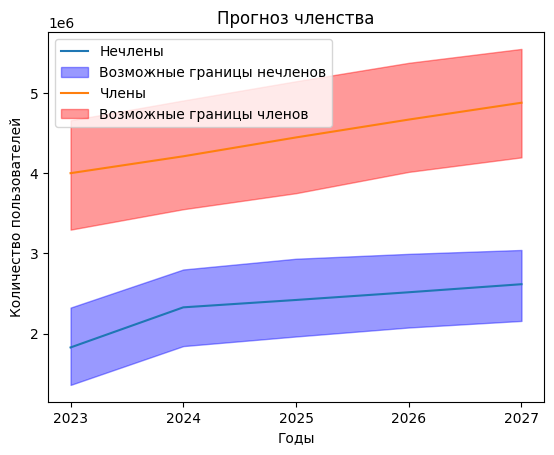

In [3]:
members = []
casuals = []
for year in range(st, end):
    root = f'data/src/{year}/part-00000'
    df = pd.read_table(root, index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    casuals.append(len(df.loc[(df['member_casual'] == 'Customer') | (df['member_casual'] == 'casual')]))
    members.append(len(df.loc[(df['member_casual'] == 'Subscriber') | (df['member_casual'] == 'member')]))
    print(year)
df_casuals = pd.DataFrame(data={'y': casuals, 'ds': [datetime(year=i, month=1, day=1) for i in
                                                     range(st, end)]})
df_members = pd.DataFrame(data={'y': members, 'ds': [datetime(year=i, month=1, day=1) for i in
                                                     range(st, end)]})

m_casuals = Prophet()
m_casuals.fit(df_casuals)
future_casuals = m_casuals.make_future_dataframe(periods=6, freq='Y')
forecast_casuals = m_casuals.predict(future_casuals)
print('=============================\nCASUALS:')
print(forecast_casuals[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
df_forecast_casuals = forecast_casuals[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-5:]
plt.plot(df_forecast_casuals['ds'].apply(lambda x: x.isoformat()[:4]), df_forecast_casuals['yhat'])
plt.fill_between(df_forecast_casuals['ds'].apply(lambda x: x.isoformat()[:4]), df_forecast_casuals['yhat_upper'], df_forecast_casuals['yhat_lower'], color='b', alpha=0.4)
m_members = Prophet()
m_members.fit(df_members)
future_members = m_members.make_future_dataframe(periods=6, freq='Y')
forecast_members = m_members.predict(future_members)
print('=============================\nMEMBERS:')
print(forecast_members[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
df_forecast_members = forecast_members[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-5:]
plt.plot(df_forecast_members['ds'].apply(lambda x: x.isoformat()[:4]), df_forecast_members['yhat'])
plt.fill_between(df_forecast_members['ds'].apply(lambda x: x.isoformat()[:4]), df_forecast_members['yhat_upper'], df_forecast_members['yhat_lower'], color='r', alpha=0.4)
plt.xlabel('Годы')
plt.ylabel('Количество пользователей')
plt.legend(['Нечлены', 'Возможные границы нечленов', 'Члены', 'Возможные границы членов'])
plt.title('Прогноз членства')

И так: Видим, что все должно пойти в гору! Но так ли это?

[Данные (внешние) о диви](https://chi.streetsblog.org/2022/09/30/whats-going-on-with-divvy-availability-lets-look-at-the-data/)

[Плохие отзывы](https://www.tripadvisor.ru/Attraction_Review-g35805-d5074715-Reviews-Divvy_Bikes-Chicago_Illinois.html)

[Исследования за 2021 год](https://www.kaggle.com/datasets/michaeljohnsonjr/divvytrips2021/code)

**Не всегда ML может правильно предсказать события! На все влияет человечкий фактор.**

### 2. Прогноз динамики среднего возраста в ближайшие 10 лет

2013


/tmp/ipykernel_4085/2230278618.py:5: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None,
/tmp/ipykernel_4085/2230278618.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None,
/tmp/ipykernel_4085/2230278618.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None,
/tmp/ipykernel_4085/2230278618.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None,
/tmp/ipykernel_4085/2230278618.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(root, index_col=False, header=None,
22:55:50 - cmdstanpy - INFO 

MEAN AGE:
           ds       yhat  yhat_lower  yhat_upper
0  2013-01-01  36.145384   36.145384   36.145384
1  2014-01-01  35.405707   35.405707   35.405707
2  2015-01-01  35.265853   35.265853   35.265853
3  2016-01-01  35.523017   35.523017   35.523017
4  2017-01-01  35.414027   35.414027   35.414027
5  2018-01-01  35.308799   35.308799   35.308799
6  2019-01-01  34.925377   34.925377   34.925377
7  2020-01-01  34.265111   33.862552   34.654745
8  2021-01-01  34.106474   32.870086   35.399656
9  2022-01-01  34.001246   31.743950   36.616280
10 2023-01-01  33.617824   30.080097   37.912996
11 2023-12-31  28.898195   23.995358   34.814417
12 2024-12-31  32.022246   25.476287   40.012064
13 2025-12-31  30.814130   22.361788   40.982011
14 2026-12-31  29.335891   18.992813   41.471046
15 2027-12-31  27.590642   15.212215   41.920870
16 2028-12-31  30.714693   16.323642   47.637752
17 2029-12-31  29.506577   12.953736   49.247384
18 2030-12-31  28.028337    9.149058   50.602729
19 2031-12

Text(0.5, 1.0, 'Прогноз среднего возраста')

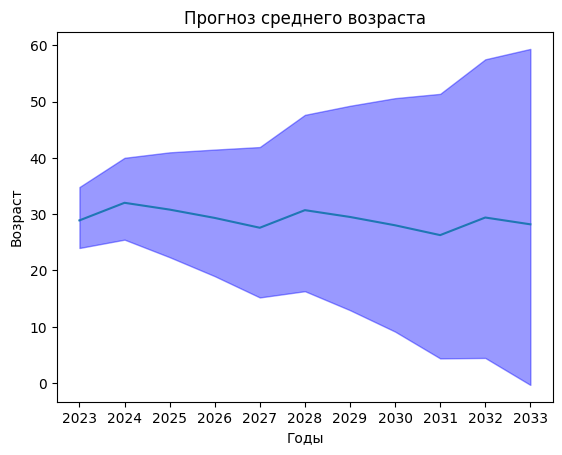

In [4]:
sredniy_age = []
print(st)
for i in range(st, 2024):
    root = f'data/src/{i}/part-00000'
    df = pd.read_table(root, index_col=False, header=None,
                       names=['id', 'biketype', 'starttime', 'endtime', 'startstation',
                              'endstation',
                              'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender',
                              'age',
                              'bikeid'], sep=',')
    sredniy_age.append(df['age'].mean())

df_meanage = pd.DataFrame(data={'y': sredniy_age, 'ds': [datetime(year=i, month=1, day=1) for i in
                                                     range(st, 2024)]})

m_meanage = Prophet()
m_meanage.fit(df_meanage)
future_meanage = m_meanage.make_future_dataframe(periods=11, freq='Y')
forecast_meanage = m_meanage.predict(future_meanage)
print('=============================\nMEAN AGE:')
print(forecast_meanage[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
df_meanage = forecast_meanage[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-11:]
plt.plot(df_meanage['ds'].apply(lambda x: x.isoformat()[:4]), df_meanage['yhat'])
plt.xlabel('Годы')
plt.ylabel('Возраст')
plt.title('Прогноз среднего возраста')

### 3. Прогноз количества уникальных байков на ближайшие 10 лет

In [5]:
from pyspark import SparkConf, SparkContext
REPAIR_LIM = 10000
REPAIR_PRICE = 60
eREPAIR_PRICE = 80
BIKE_PRICE = 1500
eBIKE_PRICE = 2000
conf = SparkConf().setAppName('test').setMaster('local')
sc = SparkContext(conf=conf)

23/04/21 22:56:05 WARN Utils: Your hostname, bigdata resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/04/21 22:56:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/21 22:56:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
def get_shortest_distance(lat1, lon1, lat2, lon2):
    return acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon2 - lon1)) * 6371


def parse_table1(line):
    id_, type_, startt, endt, startn, endn, startlt, startln, endlt, endln, member, gender, age, bikeid = line.split(",")
    return (bikeid, 1)


def parse_table2(line):
    id_, type_, startt, endt, startn, endn, startlt, startln, endlt, endln, member, gender, age, bikeid = line.split(",")
    V_AVG = 12/3.6/1000
    startt = datetime.datetime.strptime(startt, '%Y-%m-%dT%H:%M:%S')
    endt = datetime.datetime.strptime(endt, '%Y-%m-%dT%H:%M:%S')
    duration = endt - startt
    return (bikeid, V_AVG*duration.total_seconds())


def parse_table3(line):
    id_, type_, startt, endt, startn, endn, startlt, startln, endlt, endln, member, gender, age, bikeid = line.split(",")
    return (bikeid, startt[0:7])

22:59:00 - cmdstanpy - INFO - Chain [1] start processing                        
22:59:00 - cmdstanpy - INFO - Chain [1] done processing


UNIQUE BIKES BY YEAR:
           ds          yhat    yhat_lower    yhat_upper
0  2013-01-01   3037.816554   2284.349925   3748.629909
1  2014-01-01   3698.912269   2979.907012   4354.955149
2  2015-01-01   4412.429578   3714.322173   5132.721518
3  2016-01-01   5178.233348   4455.414679   5894.814271
4  2017-01-01   5452.077654   4718.177676   6168.601510
5  2018-01-01   6113.173364   5398.294403   6809.450193
6  2019-01-01   6826.690669   6100.571745   7532.454913
7  2019-12-31   8758.381306   8099.171558   9505.385245
8  2020-12-31   8410.357028   7661.358299   9145.567914
9  2021-12-31   9279.958665   8558.917165  10026.067371
10 2022-12-31  10200.887921   9518.350494  10932.977595
11 2023-12-31  11172.642392  10425.554442  11933.698033
12 2024-12-31  10824.618114  10123.371663  11565.223235
13 2025-12-31  11694.219751  10979.144463  12371.033297
14 2026-12-31  12615.149007  11850.996878  13322.065769
15 2027-12-31  13586.903478  12864.299983  14342.424825
16 2028-12-31  13238.87920

Text(0.5, 1.0, 'Прогноз количества уникальный байков')

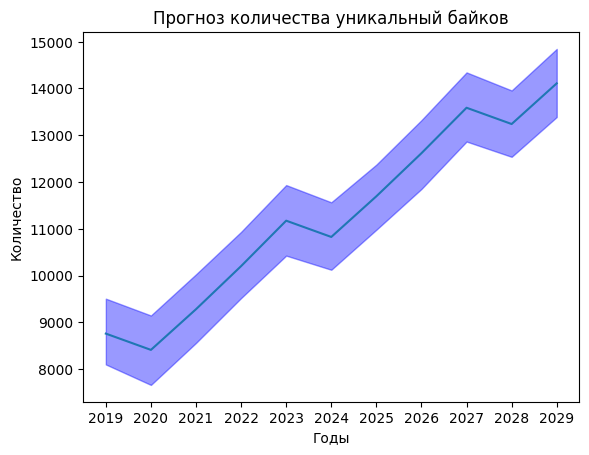

In [8]:
unique_by_year = []
for y in range(2013, 2020):
    root = f"data/src/{y}"
    df = sc.textFile(root).map(parse_table1) \
                                          .reduceByKey(lambda a, b: a + b) \
                                          .map(lambda x: (None, 1)) \
                                          .reduceByKey(lambda a, b: a + b) \
                                          .collect()
    unique_by_year.append(df[0][1])

df_unique_by_year = pd.DataFrame(data={'y': unique_by_year, 'ds': [datetime(year=i, month=1, day=1) for i in
                                                     range(2013, 2020)]})

m_unique_by_year = Prophet()
m_unique_by_year.fit(df_unique_by_year)
future_unique_by_year = m_unique_by_year.make_future_dataframe(periods=11, freq='Y')
forecast_unique_by_year = m_unique_by_year.predict(future_unique_by_year)
print('=============================\nUNIQUE BIKES BY YEAR:')
print(forecast_unique_by_year[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
df = forecast_unique_by_year[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-11:]
plt.plot(df['ds'].apply(lambda x: x.isoformat()[:4]), df['yhat'])
plt.fill_between(df['ds'].apply(lambda x: x.isoformat()[:4]), df['yhat_upper'], df['yhat_lower'], color='b', alpha=0.4)
plt.xlabel('Годы')
plt.ylabel('Количество')
plt.title('Прогноз количества уникальный байков')

### 4. Прогноз ремонтов байков на 7 лет

23:07:45 - cmdstanpy - INFO - Chain [1] start processing                        
23:07:45 - cmdstanpy - INFO - Chain [1] done processing


REPAIRS:
           ds        yhat  yhat_lower  yhat_upper
0  2013-01-01  -76.670428 -180.306732   30.707170
1  2014-01-01  -24.825838 -126.108077   81.936663
2  2015-01-01   26.116014  -76.640944  126.786889
3  2016-01-01   76.155023  -21.926777  169.074286
4  2017-01-01  127.054426   27.346215  229.664148
5  2018-01-01  178.899016   78.414446  282.695237
6  2019-01-01  229.840870  136.161342  335.106504
7  2019-12-31  267.336578  164.851385  369.139835
8  2020-12-31  329.017542  227.565773  426.450553
9  2021-12-31  377.256959  266.469177  487.611225
10 2022-12-31  424.602828  325.511581  522.583242
11 2023-12-31  471.061434  371.014186  568.091532
12 2024-12-31  532.742398  439.256253  632.122993
13 2025-12-31  580.981815  480.281039  684.045127
14 2026-12-31  628.327684  530.883040  733.829497
15 2027-12-31  674.786290  569.894422  765.155898
16 2028-12-31  736.467254  636.012854  838.377128
17 2029-12-31  784.706672  685.598194  892.829575


Text(0.5, 1.0, 'Прогноз стоимости ремонта')

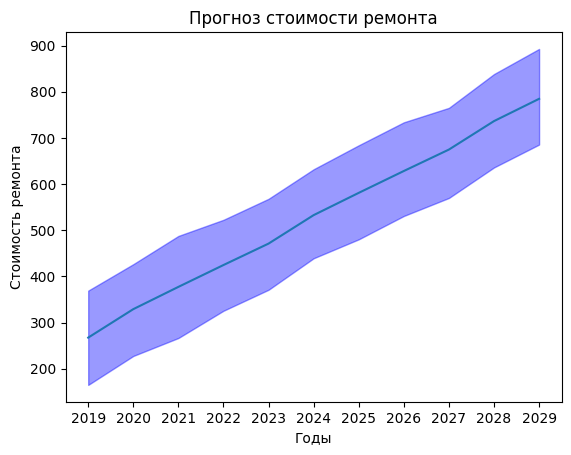

In [9]:
from math import floor
import datetime

cum_repairs = []
run = []
big = sc.parallelize([])
for y in range(2013, 2020):
    root = f"data/src/{y}"
    df = sc.textFile(root).map(parse_table2) \
                                          .reduceByKey(lambda a, b: a + b)
    big = big.union(df)
    analyse_rep = big.map(lambda x: (None, floor(x[1] / REPAIR_LIM))) \
                 .reduceByKey(lambda a, b: a + b) \
                 .collect()
    cum_repairs.append(analyse_rep[0][1])
    analyse_run = df.map(lambda x: (None, x[1])) \
                    .reduceByKey(lambda a, b: a + b) \
                    .collect()
    run.append(analyse_run[0][1])

cum = 0
repairs = []
for s in cum_repairs:
    repairs.append(s - cum)

df_repairs = pd.DataFrame(data={'y': repairs, 'ds': [datetime.datetime(year=i, month=1, day=1) for i in
                                                     range(2013, 2020)]})

m_repairs = Prophet()
m_repairs.fit(df_repairs)
future_repairs = m_repairs.make_future_dataframe(periods=11, freq='Y')
forecast_repairs = m_repairs.predict(future_repairs)
print('=============================\nREPAIRS:')
print(forecast_repairs[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
df = forecast_repairs[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-11:]
plt.plot(df['ds'].apply(lambda x: x.isoformat()[:4]), df['yhat'])
plt.fill_between(df['ds'].apply(lambda x: x.isoformat()[:4]), df['yhat_upper'], df['yhat_lower'], color='b', alpha=0.4)
plt.xlabel('Годы')
plt.ylabel('Стоимость ремонта')
plt.title('Прогноз стоимости ремонта')

### 5. Прогноз по пробегу на ближайшие 5 лет

23:07:46 - cmdstanpy - INFO - Chain [1] start processing
23:07:46 - cmdstanpy - INFO - Chain [1] done processing


RUN:
           ds          yhat    yhat_lower    yhat_upper
0  2013-01-01  4.018588e+06  3.066978e+06  5.027913e+06
1  2014-01-01  7.365530e+06  6.333652e+06  8.317042e+06
2  2015-01-01  1.024845e+07  9.164599e+06  1.119177e+07
3  2016-01-01  1.266653e+07  1.167147e+07  1.363700e+07
4  2017-01-01  1.268319e+07  1.170037e+07  1.369847e+07
5  2018-01-01  1.603011e+07  1.508377e+07  1.699129e+07
6  2019-01-01  1.891303e+07  1.789339e+07  1.981904e+07
7  2019-12-31  1.770189e+07  1.677014e+07  1.864928e+07
8  2020-12-31  2.328431e+07  2.229430e+07  2.420311e+07
9  2021-12-31  2.477341e+07  2.384641e+07  2.572405e+07
10 2022-12-31  2.580000e+07  2.481103e+07  2.676148e+07
11 2023-12-31  2.636647e+07  2.533636e+07  2.731092e+07
12 2024-12-31  3.194889e+07  3.102589e+07  3.297802e+07
13 2025-12-31  3.343799e+07  3.253025e+07  3.439297e+07
14 2026-12-31  3.446458e+07  3.346036e+07  3.545413e+07
15 2027-12-31  3.503105e+07  3.412191e+07  3.604173e+07


Text(0.5, 1.0, 'Прогноз Пробега')

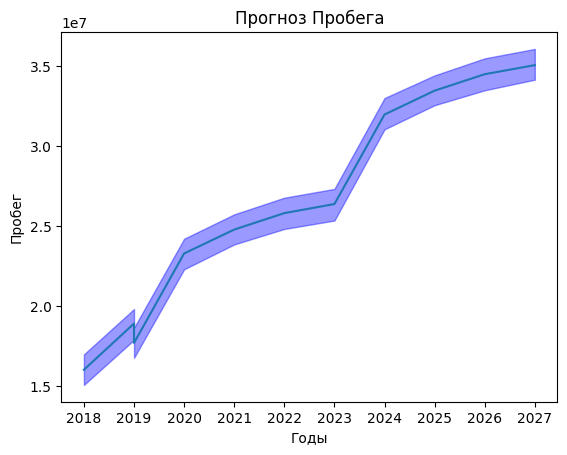

In [10]:
df_run = pd.DataFrame(data={'y': run, 'ds': [datetime.datetime(year=i, month=1, day=1) for i in
                                                     range(2013, 2020)]})

m_run = Prophet()
m_run.fit(df_run)
future_run = m_run.make_future_dataframe(periods=9, freq='Y')
forecast_run = m_run.predict(future_run)
print('=============================\nRUN:')
print(forecast_run[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
df = forecast_run[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-9:]
plt.plot(df['ds'].apply(lambda x: x.isoformat()[:4]), df['yhat'])
plt.fill_between(df['ds'].apply(lambda x: x.isoformat()[:4]), df['yhat_upper'], df['yhat_lower'], color='b', alpha=0.4)
plt.xlabel('Годы')
plt.ylabel('Пробег')
plt.title('Прогноз Пробега')